In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import random
from collections import Counter, defaultdict
from scipy import integrate
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm
import tqdm
import matplotlib.ticker as ticker
from sklearn.metrics import r2_score
import scipy
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import time

from simulation.SEIR_model import SEIRModel
from simulation.model_output import SEIRModelOutput
from simulation.error_model import NaiveErrorModel

In [13]:
N_experiments = 21
I_t = np.linspace(1e3, 1e5, N_experiments)
p_geom = np.linspace(1/50, 0.9, N_experiments)
mean_uniform = np.linspace(1/20, 0.5, N_experiments)

In [14]:
def expected_val(I, p, a, b):
    return ((a+b)/2)*(I+(1/p))

def variance(I, p, a, b):
    return (I**2*(a+b)**2/4) + 2*I*(a+b)**2/(4*p) + (a+b)**2/(4*p**2)

In [22]:
for I in [20000]:
    expected_val_arr = []
    variance_arr = []
    for p in p_geom:
        expected_val_curr = []
        variance_curr = []
        for mean in mean_uniform:
            # +- 10% for edges of unfiform distribution
            a = mean*0.9
            b = mean*1.1
            expected_val_curr.append(expected_val(I, p, a, b))
            variance_curr.append(variance(I, p, a, b))
        expected_val_arr.append(expected_val_curr)
        variance_arr.append(variance_curr)
        

Text(0, 0.5, 'Parameter p from Geometric distribution')

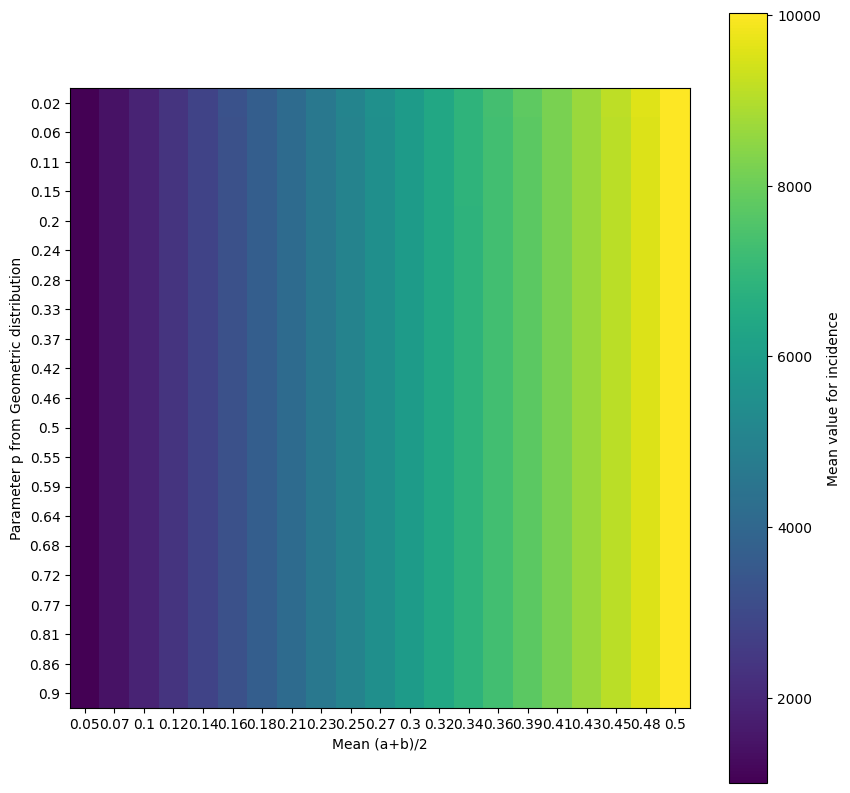

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xticks(ticks=np.arange(len(mean_uniform)), labels=[round(elem, 2) for elem in mean_uniform])
ax.set_yticks(ticks=np.arange(len(p_geom)), labels=[round(elem, 2) for elem in p_geom])

expected_val_numpy_arr = np.array(expected_val_arr)
norm = mpl.colors.Normalize(vmin=0, vmax=1)

im = ax.imshow(expected_val_numpy_arr, cmap='viridis', interpolation='nearest')

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Mean value for incidence')
# ax.set_title('Colormap 2D Plot of R2 Scores')
ax.set_xlabel(r'Mean (a+b)/2')
ax.set_ylabel(r'Parameter p from Geometric distribution')

Text(0, 0.5, 'Parameter p from Geometric distribution')

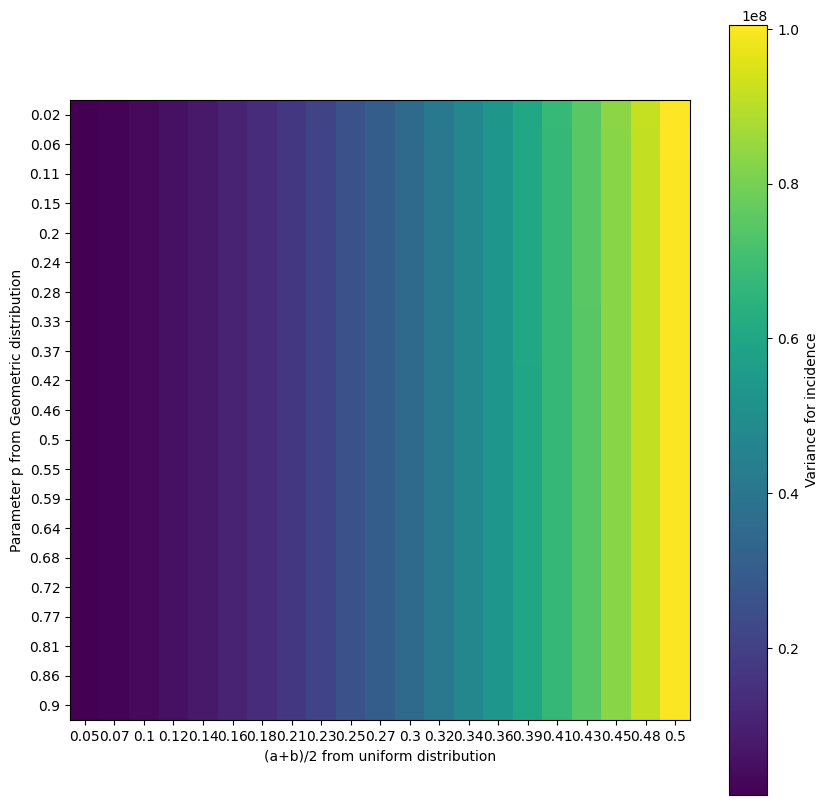

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xticks(ticks=np.arange(len(mean_uniform)), labels=[round(elem, 2) for elem in mean_uniform])
ax.set_yticks(ticks=np.arange(len(p_geom)), labels=[round(elem, 2) for elem in p_geom])

variance_numpy_arr = np.array(variance_arr)
norm = mpl.colors.Normalize(vmin=0, vmax=1)

im = ax.imshow(variance_numpy_arr, cmap='viridis', interpolation='nearest')

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Variance for incidence')
# ax.set_title('Colormap 2D Plot of R2 Scores')
ax.set_xlabel(r'(a+b)/2 from uniform distribution')
ax.set_ylabel(r'Parameter p from Geometric distribution')

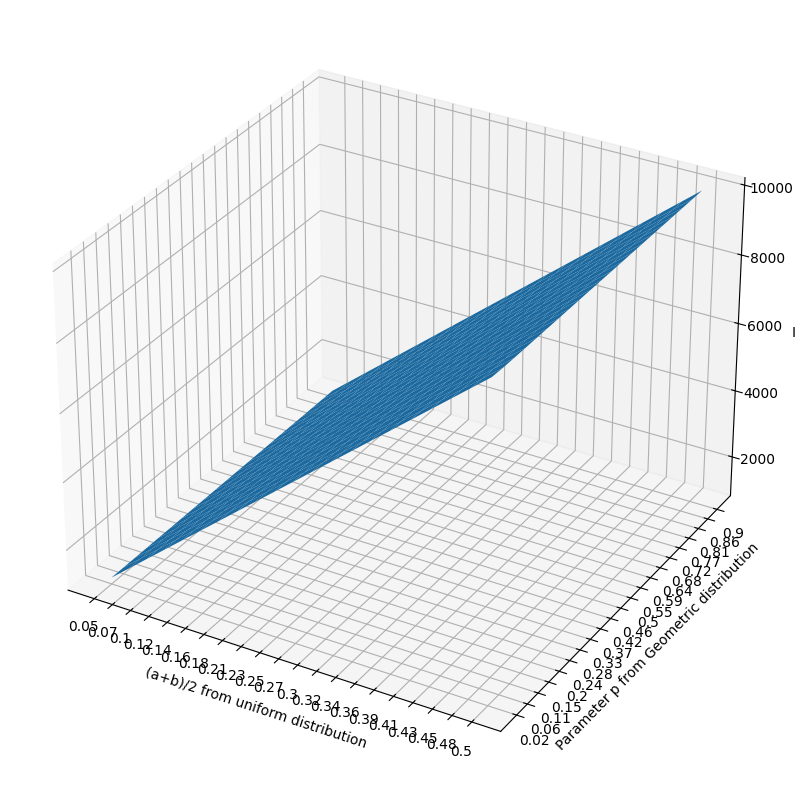

In [36]:
fig = plt.figure(figsize=(10, 10))
x, y = np.meshgrid(np.arange(expected_val_numpy_arr.shape[1]), 
                   np.arange(expected_val_numpy_arr.shape[0]))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, expected_val_numpy_arr)
ax.set_xlabel('(a+b)/2 from uniform distribution')
ax.set_ylabel('Parameter p from Geometric distribution')
ax.set_zlabel('I')
ax.set_xticks(ticks=np.arange(len(mean_uniform)), labels=[round(elem, 2) for elem in mean_uniform])
ax.set_yticks(ticks=np.arange(len(p_geom)), labels=[round(elem, 2) for elem in p_geom])

plt.show()